# Homework 2: More Exploratory Data Analysis
## Gene Expression Data and Election Polls 

Due: Thursday, October 2, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW2.ipynb download=HW2.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.


---

## Introduction

John Tukey wrote in [Exploratory Data Analysis, 1977](http://www.amazon.com/Exploratory-Data-Analysis-Wilder-Tukey/dp/0201076160/ref=pd_bbs_sr_2/103-4466654-5303007?ie=UTF8&s=books&qid=1189739816&sr=8-2): "The greatest value of a picture is when it forces us to notice what we never expected to see." In this assignment we will continue using our exploratory data analysis tools, but apply it to new sets of data: [gene expression](http://en.wikipedia.org/wiki/Gene_expression) and polls from the [2012 Presidental Election](http://en.wikipedia.org/wiki/United_States_presidential_election,_2012) and from the [2014 Senate Midterm Elections](http://en.wikipedia.org/wiki/United_States_Senate_elections,_2014).   

**First**: You will use exploratory data analysis and apply the [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) to a gene expression data matrix to determine if the the date that the gene expression samples are processed has large effect on the variability seen in the data.  

**Second**: You will use the polls from the 2012 Presidential Elections to determine (1) Is there a pollster bias in presidential election polls? and (2) Is the average of polls better than just one poll?

**Finally**: You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a preliminary prediction of the result of each state.

#### Data

We will use the following data sets: 

1. A gene expression data set called `exprs_GSE5859.csv` and sample annotation table called `sampleinfo_GSE5859.csv` which are both available on Github in the 2014_data repository: [expression data set](https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv) and [sample annotation table](https://github.com/cs109/2014_data/blob/master/sampleinfo_GSE5859.csv).  

2. Polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama). The polls we will use are from the [Huffington Post Pollster](http://elections.huffingtonpost.com/pollster).  

3. Polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Load Python modules

In [11]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
#from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

## Problem 1

In this problem we will be using a [gene expression](http://en.wikipedia.org/wiki/Gene_expression) data set obtained from a [microarray](http://en.wikipedia.org/wiki/DNA_microarray) experiement [Read more about the specific experiment here](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE5859).  There are two data sets we will use:  

1. The gene expression intensities where the rows represent the features on the microarray (e.g. genes) and the columsns represent the different microarray samples.  

2. A table that contains the information about each of the samples (columns in the gene expression data set) such as the sex, the age, the treatment status, the date the samples were processed.  Each row represents one sample. 

#### Problem 1(a) 
Read in the two files from Github: [exprs_GSE5859.csv](https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv) and [sampleinfo_GSE5859.csv](https://github.com/cs109/2014_data/blob/master/sampleinfo_GSE5859.csv) as pandas DataFrames called `exprs` and `sampleinfo`. Use the gene names as the index of the `exprs` DataFrame.

In [12]:
#your code here
url='https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv'
exprs=pd.read_csv(url)

url='https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv'

sampleinfo=pd.read_csv(url)
print 'test'

test


In [3]:
 exprs.head()

,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
2,117_at,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
3,121_at,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
4,1255_g_at,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846


In [4]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


Make sure the order of the columns in the gene expression DataFrame match the order of file names in the sample annotation DataFrame. If the order of the columns the `exprs` DataFrame do not match the order of the file names in the `sampleinfo` DataFrame, reorder the columns in the `exprs` DataFrame. 

**Note**: The column names of the gene expression DataFrame are the filenames of the orignal files from which these data were obtained.  

**Hint**: The method `list.index(x)` [[read here](https://docs.python.org/2/tutorial/datastructures.html)] can be used to return the index in the list of the first item whose value is x. It is an error if there is no such item. To check if the order of the columns in `exprs` matches the order of the rows in `sampleinfo`, you can check using the method `.all()` on a Boolean or list of Booleans: 

Example code: `(exprs.columns == sampleinfo.filename).all()`

In [5]:
#your code here
sampleinfo_sorted=sampleinfo.sort_values(by='filename')
exprs_sorted= exprs.sort_index(axis=1)
#index_check=(exprs.columns == sampleinfo.filename).all()

In [6]:
sampleinfo_sorted.head()

,ethnicity,date,filename,sex
99,ASN,2005-05-13,GSM136441.CEL.gz,F
100,ASN,2005-06-10,GSM136442.CEL.gz,F
101,ASN,2005-06-10,GSM136443.CEL.gz,M
102,ASN,2005-06-10,GSM136444.CEL.gz,M
103,ASN,2005-06-10,GSM136445.CEL.gz,F


In [7]:

exprs_sorted
exprs_columns=exprs_sorted.columns
#sampleinfo_sorted.filename
Num_col=len(exprs_columns)
column_name=exprs_columns[0:Num_col-1]

In [8]:
index_check=(column_name == sampleinfo_sorted.filename).all()
(index_check)

True

Show the head of the two tables: `exprs` and `sampleinfo`. 

In [52]:
#your code here
print (sampleinfo_sorted.head())

print (exprs_sorted.head())


    ethnicity        date          filename sex
99        ASN  2005-05-13  GSM136441.CEL.gz   F
100       ASN  2005-06-10  GSM136442.CEL.gz   F
101       ASN  2005-06-10  GSM136443.CEL.gz   M
102       ASN  2005-06-10  GSM136444.CEL.gz   M
103       ASN  2005-06-10  GSM136445.CEL.gz   F
   GSM136441.CEL.gz  GSM136442.CEL.gz  GSM136443.CEL.gz  GSM136444.CEL.gz  \
0          6.302996          6.444051          6.238090          6.499574   
1          7.097359          7.099125          7.308965          6.889842   
2          5.204992          5.448902          5.440455          5.386826   
3          7.380881          7.638094          7.720119          7.822919   
4          3.200968          3.327960          3.192055          3.538002   

   GSM136445.CEL.gz  GSM136506.CEL.gz  GSM136507.CEL.gz  GSM136508.CEL.gz  \
0          6.454842          6.171587          6.517539          6.543954   
1          6.880901          7.123658          7.689282          7.546708   
2          5.14785

#### Problem 1(b)

Extract the year and month as integers from the `sampleinfo` table. 

**Hint**: To convert a Series or a column of a pandas DataFrame that contains a date-like object, you can use the `to_datetime` function [[read here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)].  This will create a `DatetimeIndex` which can be used to extract the month and year for each row in the DataFrame. 

In [103]:
#your code here
#date_col=(sampleinfo_sorted['date'])
#dates=pd.to_datetime(date_col)
#years=date_col.year
#months=date_col.month
dates = sampleinfo.loc[:,['date']].values[:,0]
dates[:10]

array(['2003-02-04', '2003-02-04', '2002-12-17', '2003-01-30',
       '2003-01-03', '2003-01-16', '2003-01-03', '2003-02-04',
       '2002-12-17', '2002-12-17'], dtype=object)

In [104]:
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2003-02-04', '2003-02-04', '2002-12-17', '2003-01-30',
               '2003-01-03', '2003-01-16', '2003-01-03', '2003-02-04',
               '2002-12-17', '2002-12-17',
               ...
               '2006-04-28', '2006-04-28', '2006-04-28', '2006-04-28',
               '2006-04-28', '2006-04-28', '2005-02-16', '2005-02-16',
               '2005-06-10', '2005-05-13'],
              dtype='datetime64[ns]', length=208, freq=None)

In [105]:
years = dates.year
years[:10]

array([2003, 2003, 2002, 2003, 2003, 2003, 2003, 2003, 2002, 2002])

In [106]:
months = dates.month
months[:10]

array([ 2,  2, 12,  1,  1,  1,  1,  2, 12, 12])

In [107]:
sampleinfo.dtypes

ethnicity    object
date         object
filename     object
sex          object
dtype: object

#### Problem 1(c)

Convert the dates in the `date` column from the `sampleinfo` table into days since October 31, 2002. Add a column to the `sampleinfo` DataFrame titled `elapsedInDays` containing the days since October 31, 2002.  Show the head of the `sampleinfo` DataFrame which includes the new column.  

**Hint**: Use the `datetime` module to create a new `datetime` object for the specific date October 31, 2002. Then, subtract the October 31, 2002 date from each date from the `date` column in the `sampleinfo` DataFrame. 

In [72]:
#your code here
Original_date= pd.to_datetime(['2002/10/31'])
Original_date
Days_since_OriDate=(date_col-Original_date)
#Days_since_OriDate

sampleinfo_sorted['Days_since_OriDate']=pd.Series(Days_since_OriDate,index=sampleinfo_sorted.index)
sampleinfo_sorted.head()

C:\Anaconda2\envs\snakes\lib\site-packages\pandas\indexes\base.py:2683: RuntimeWarning: Cannot compare type 'Timestamp' with type 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,ethnicity,date,filename,sex,Days_since_OriDate
99,ASN,2005-05-13,GSM136441.CEL.gz,F,925 days
100,ASN,2005-06-10,GSM136442.CEL.gz,F,953 days
101,ASN,2005-06-10,GSM136443.CEL.gz,M,953 days
102,ASN,2005-06-10,GSM136444.CEL.gz,M,953 days
103,ASN,2005-06-10,GSM136445.CEL.gz,F,953 days


In [109]:
sampleinfo['date'] = sampleinfo['date'].apply(pd.to_datetime)
sampleinfo.dtypes

ethnicity            object
date         datetime64[ns]
filename             object
sex                  object
dtype: object

In [110]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


In [111]:

#transform the date column
sampleinfo['days'] = sampleinfo['date'].apply(lambda x: x-pd.datetime(2002,10,31))
sampleinfo.head()

,ethnicity,date,filename,sex,days
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


#### Problem 1(d)

Use exploratory analysis and the singular value decomposition (SVD) of the gene expression data matrix to determine if the date the samples were processed has large effect on the variability seen in the data or if it is just ethnicity (which is confounded with date). 

**Hint**: See the end of the [lecture from 9/23/2014 for help with SVD](http://nbviewer.ipython.org/github/cs109/2014/blob/master/lectures/lecture07/data_scraping_transcript.ipynb). 

First subset the the `sampleinfo` DataFrame to include only the CEU ethnicity.  Call this new subsetted DataFrame `sampleinfoCEU`.  Show the head of `sampleinfoCEU` DataFrame. 

In [75]:
#your code here
sampleinfoCEU= sampleinfo_sorted[sampleinfo_sorted.ethnicity=='CEU']
sampleinfoCEU.head()

,ethnicity,date,filename,sex,Days_since_OriDate
204,CEU,2005-02-16,GSM136725.CEL.gz,F,839 days
205,CEU,2005-02-16,GSM136726.CEL.gz,M,839 days
206,CEU,2005-06-10,GSM136727.CEL.gz,M,953 days
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days


In [112]:

sampleinfoCEU = sampleinfo[sampleinfo.ethnicity=='CEU']
sampleinfoCEU.head()

,ethnicity,date,filename,sex,days
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


Next, subset the `exprs` DataFrame to only include the samples with the CEU ethnicity. Name this new subsetted DataFrame `exprsCEU`. Show the head of the `exprsCEU` DataFrame. 

In [113]:
#your code here
sampleinfoCeuFilenames = sampleinfoCEU.loc[:,['filename']].values[:,0]
sampleinfoCeuFilenames[:10]

array(['GSM25349.CEL.gz', 'GSM25350.CEL.gz', 'GSM25356.CEL.gz',
       'GSM25357.CEL.gz', 'GSM25358.CEL.gz', 'GSM25359.CEL.gz',
       'GSM25360.CEL.gz', 'GSM25361.CEL.gz', 'GSM25377.CEL.gz',
       'GSM25378.CEL.gz'], dtype=object)

In [114]:

exprsCEU = exprs.loc[:,sampleinfoCeuFilenames]
exprsCEU.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
0,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
2,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
3,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
4,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123


Check to make sure the order of the columns in the `exprsCEU` DataFrame matches the rows in the `sampleinfoCEU` DataFrame.  

In [115]:
#your code here
(exprsCEU.columns == sampleinfoCEU.filename).all()

True

Compute the average gene expression intensity in the `exprsCEU` DataFrame across all the samples. For each sample in the `exprsCEU` DataFrame, subtract the average gene expression intensity from each of the samples. Show the head of the mean normalized gene expression data.  

In [132]:
#your code here
Gene_average=exprsCEU.mean(axis=1)
Gene_average.head()

0    6.261955
1    7.075217
2    5.604127
3    7.415835
4    3.133934
dtype: float64

In [136]:
meanNormalizedExprsCEU = exprsCEU.apply(lambda x: x - Gene_average, axis = 0)
meanNormalizedExprsCEU


,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
0,0.365059,-0.012149,-0.327827,-0.116687,-0.170685,-0.220769,-0.211580,-0.198109,-0.035849,0.096327,...,0.239554,0.296144,0.356331,0.608040,-0.280956,0.141330,-0.013254,0.226624,0.547526,-0.128887
1,-0.136032,-0.257178,-0.027254,0.347260,0.197144,0.053000,-0.324497,-0.238930,-0.337195,0.292678,...,-0.008531,0.311485,-0.667259,0.013964,0.045706,-0.056219,0.080203,0.442193,0.125379,0.205564
2,-0.490556,-0.530031,-0.232926,-0.337577,-0.262080,-0.540250,-0.288228,-0.120475,1.085317,0.878655,...,-0.003613,-0.371451,0.026594,-0.659379,-0.328549,0.166231,0.012716,-0.356936,-0.366887,-0.202251
3,0.418026,0.364847,0.042362,0.240113,0.130720,-0.343165,-0.322852,-0.461611,0.073949,-0.027296,...,0.021700,0.298814,0.000417,0.330612,0.585598,0.210887,0.036463,-0.083972,-0.058733,0.191626
4,0.018335,-0.022187,-0.115002,0.020611,-0.025980,0.090351,-0.019693,-0.088959,0.170104,-0.246015,...,-0.123951,0.017269,0.065775,0.025562,0.015776,0.108846,0.299192,0.041912,-0.028842,0.091189
5,-0.032940,0.114157,-0.144484,-0.358229,0.148120,-0.002672,-0.022711,0.303025,0.065287,0.158625,...,0.470964,-0.270622,0.222084,0.119848,-0.070430,0.035018,0.115870,0.006071,-0.476972,-0.425343
6,0.103536,-0.010997,0.067993,0.145587,-0.071506,-0.134743,0.224460,-0.065118,0.188815,0.032092,...,-0.076115,-0.053057,-0.043768,0.123365,0.091698,-0.018328,-0.081443,-0.035033,-0.080025,-0.077043
7,-0.006362,-0.001619,0.063070,0.157686,-0.128003,-0.166288,-0.074152,0.178465,0.169234,-0.120838,...,0.052318,0.091057,0.115051,0.081394,-0.009740,-0.081915,-0.014233,0.051340,0.011580,0.117273
8,0.049920,0.072492,-0.107353,-0.076311,0.034343,-0.222854,0.108903,0.162346,0.110924,-0.084994,...,0.102390,0.116667,0.234336,0.142352,0.245961,0.056870,-0.059084,0.039648,0.040371,0.103739
9,0.322411,0.054074,-0.132075,0.215870,-0.174145,-0.055737,0.085496,0.164815,0.201126,-0.288742,...,0.191635,0.173617,0.320945,-0.001161,0.361739,-0.118208,-0.116108,0.100176,0.113679,0.088857


Using this mean normalized gene expression data, compute the projection to the first Principal Component (PC1).  

**Hint**: Use the `numpy.linalg.svd()` function in the `numpy.linalg` module (or the `scipy.linalg.svd()` function in the `scipy.linalg` module) to apply an [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition) to a matrix.  

In [139]:
#your code here
import scipy
U, s, Vt= np.linalg.svd(meanNormalizedExprsCEU.values, full_matrices=True)


AttributeError: module 'scipy' has no attribute 'sparse'

In [ ]:
meanNormalizedExprsCEU.values.shape, U.shape, s.shape, Vt.shape

V = Vt.T

Create a histogram using the values from PC1.  Use a bin size of 25.  

In [11]:
#your code here
PC1 = V[:,0]
PC1[:10]

In [ ]:

plt.hist(PC1 , bins=25)

plt.title('Distribution of PC1 values')
plt.xlabel('PC1 values')
plt.ylabel('#values')
plt.show()

Create a scatter plot with the days since October 31, 2002 on the x-axis and PC1 on the y-axis.

In [12]:
#your code here
days = sampleinfoCEU['days'].values / np.timedelta64(1,'D') #to allow plotting
plt.scatter(days, PC1)

plt.title('Relationship between days and PC1 values')
plt.xlabel('#days since 10/31/2012')
plt.ylabel('PC1')
plt.show()

Around what day do you notice a difference in the way the samples were processed?

In [13]:
#your code here

days = sampleinfoCEU['days'] / np.timedelta64(1,'D') #to allow plotting

plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(days, PC1, s=5)
plt.xlim(10,170)
plt.axvline(x=97, color='r')
plt.axhline(y=-0.03, color='g')

plt.title('Relationship between days and PC1 values')
plt.xlabel('#days since 10/31/2012')
plt.ylabel('PC1')
plt.show()

Answer:

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2: Is there a pollster bias in presidential election polls?

#### Problem 2(a)

The [HuffPost Pollster](http://elections.huffingtonpost.com/pollster) contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to access the data.  

Read in the polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama) into a pandas DataFrame called `election`. For this problem, you may read in the polls for this race directly using [the CSV file](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv) available from the HuffPost Pollster page.

In [99]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
#from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

In [100]:
#your code here
url = 'http://elections.huffingtonpost.com/pollster/api/charts/2012-general-election-romney-vs-obama.csv'
election=pd.read_csv(url)

Show the head of the `election` DataFrame. 

In [101]:
#your code here
election.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


How many polls were conducted in November? Define this number as M.  

**Hint**: Subset the `election` DataFrame for only dates in the `Start Date` column that are in November 2012.  

In [102]:
#your code here

election['start_date'] = election['start_date'].apply(pd.to_datetime)
election['end_date'] = election['end_date'].apply(pd.to_datetime)
time_begin=pd.to_datetime(['2012-11-01']) #['2002/10/31']
time_end=pd.to_datetime(['2012-11-30'])
election['start_date']
Index_nov=[]
for i in range(len(election['start_date'])):
    if election['start_date'][i] >= time_begin and election['start_date'][i] <= time_end:
        Index_nov.append(True)
    else:
        Index_nov.append(False)

Index_nov

electionNov = election[Index_nov]
#(electionNov.size)


In [103]:
electionNov.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


In [104]:
#election['start_date'].year
electionNov.drop_duplicates('pollster', inplace = True)
electionNov.head()

C:\Anaconda2\envs\snakes\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


In [97]:
M = len(electionNov.values)
M

18

Answer:18

What was the median of the number of observations in the November polls? Define this quantity as N. 

In [98]:
#your code here
N = np.median(electionNov['sample_size'].values)
N

1200.0

Answer: 1200

#### Problem 2(b)

Using the median sample size $N$ from Problem 1(a), simulate the results from a single poll:  simulate the number of votes for Obama out of a sample size $N$ where $p$ = 0.53 is the percent of voters who are voting for Obama.  

**Hint**: Use the binomial distribution with parameters $N$ and $p$ = 0.53. 

In [108]:
#your code here
p=0.53
Single_poll= np.random.binomial(N,p)
percentage= Single_poll/N

In [112]:
percentage


C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


0.53666666666666663

Now, perform a Monte Carlo simulation to obtain the estimated percentage of Obama votes with a sample size $N$ where $N$ is the median sample size calculated in Problem 2(a). Let $p$=0.53 be the percent of voters are voting for Obama. 

**Hint**: You will repeat the simulation above 1,000 times and plot the distribution of the estimated *percent* of Obama votes from a single poll.  The results from the single poll you simulate is random variable and will be different every time you sample. 

In [132]:
#your code here
tt=np.mean( np.random.binomial(1, p, size=N) )
tt

simulations= [np.mean( np.random.binomial(1, p, size=N) ) for i in range(1000)]
print (simulations[:10])

[0.52333333333333332, 0.51583333333333337, 0.53000000000000003, 0.53500000000000003, 0.51833333333333331, 0.53500000000000003, 0.53083333333333338, 0.52249999999999996, 0.51083333333333336, 0.50583333333333336]


C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Plot the distribution of the estimated percentage of Obama votes from your single poll. What is the distribution of the estimated percentage of Obama votes? 

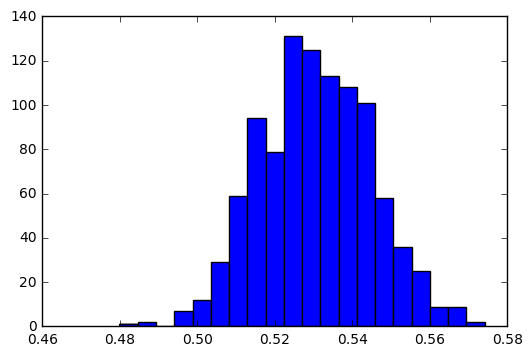

In [133]:
#your code here
plt.hist(simulations, bins=20)
plt.show()

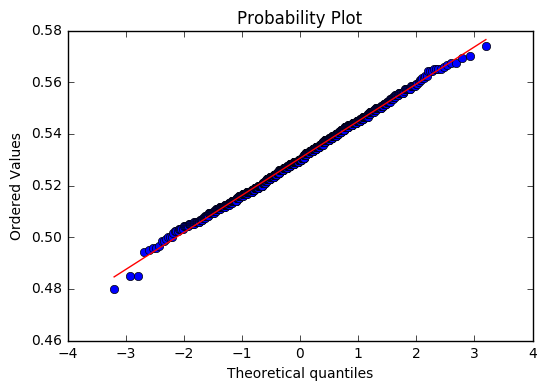

In [134]:
import scipy.stats as stats
stats.probplot(simulations, dist="norm", plot = plt)
plt.show()

Answer: Normal distribution

What is the standard error (SE) of the estimated percentage from the poll. 

**Hint**: Remember the SE is the standard deviation (SD) of the distribution of a random variable. 

In [135]:
#your code here
np.std(simulations)

0.01433668672012858

In [136]:
theorical_variance= (p*(1-p))/N
theorical_sd= np.sqrt(theorical_variance)
theorical_sd

0.014407752542757436

#### Problem 2(c)

Now suppose we run M polls where M is the number of polls that happened in November (calculated in Problem 2(a)). Run 1,000 simulations and compute the mean of the M polls for each simulation. 

In [125]:
#your code here
np.mean([np.mean( np.random.binomial(1, p, size=N) ) for i in range(M)])

C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


0.53282407407407417

In [127]:
results = [np.mean([np.mean( np.random.binomial(1, p, size=N) ) for i in range(M)]) for simulation in range(1000)]
print (results[:10])

C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


[0.53097222222222229, 0.52981481481481474, 0.53074074074074074, 0.52810185185185199, 0.52935185185185185, 0.52962962962962967, 0.53481481481481474, 0.52986111111111123, 0.53203703703703709, 0.53060185185185171]


What is the distribution of the average of polls?

**Hint**: Show a plot. 

(array([   6.,    4.,   11.,   14.,   22.,   53.,   57.,   61.,   58.,
          87.,  109.,   98.,   87.,   82.,   65.,   59.,   50.,   34.,
          19.,   13.,    4.,    3.,    2.,    1.,    1.]),
 array([ 0.52050926,  0.52136852,  0.52222778,  0.52308704,  0.5239463 ,
         0.52480556,  0.52566481,  0.52652407,  0.52738333,  0.52824259,
         0.52910185,  0.52996111,  0.53082037,  0.53167963,  0.53253889,
         0.53339815,  0.53425741,  0.53511667,  0.53597593,  0.53683519,
         0.53769444,  0.5385537 ,  0.53941296,  0.54027222,  0.54113148,
         0.54199074]),
 <a list of 25 Patch objects>)

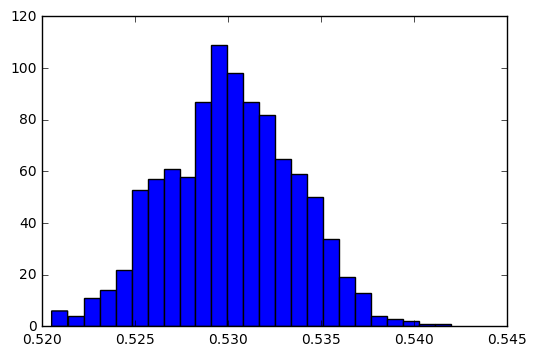

In [129]:
plt.hist(results,bins=25)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

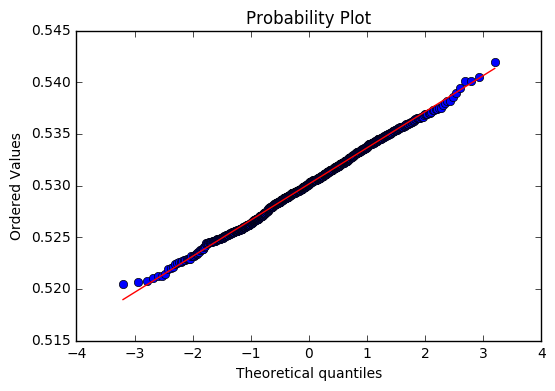

In [130]:
#your code here
stats.probplot(results, dist="norm", plot = plt)

Answer: Normal distribution

What is the standard error (SE) of the average of polls? 

In [137]:
#your code here
np.std(results)

0.003491312724530187

Answer: 

0.003491312724530187


Is the SE of the average of polls larger, the same, or smaller than that the SD of a single poll (calculated in Problem 2(b))? By how much?

**Hint**: Compute a ratio of the two quantities.  

In [138]:
#your code here
np.std(results)/np.std(simulations)

0.24352298356554136

Answer: 

#### Problem 2(d) 

Repeat Problem 2(c) but now record the *across poll* standard deviation in each simulation. 

In [139]:
#your code here
[np.mean( np.random.binomial(1, p, size=N) ) for i in range(M)]


C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


[0.51500000000000001,
 0.52583333333333337,
 0.50916666666666666,
 0.52166666666666661,
 0.53583333333333338,
 0.53916666666666668,
 0.54500000000000004,
 0.50749999999999995,
 0.54083333333333339,
 0.51583333333333337,
 0.53500000000000003,
 0.52666666666666662,
 0.55000000000000004,
 0.53333333333333333,
 0.54749999999999999,
 0.50916666666666666,
 0.51833333333333331,
 0.54583333333333328]

In [140]:
sd_accrossPolls = [np.std([np.mean( np.random.binomial(1, p, size=N) ) for i in range(M)]) for simulation in range(1000)]

C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [142]:
sd_accrossPolls[:10]

[0.013732140165515987,
 0.012478805763311784,
 0.011746584741379927,
 0.014283964288756437,
 0.014977477947872686,
 0.010043308994328284,
 0.01493182954656534,
 0.012008245481068734,
 0.012102475259524693,
 0.011548583040061506]

What is the distribution of the *across M polls* standard deviation?

**Hint**: Show a plot. 

(array([   8.,   46.,  163.,  246.,  250.,  170.,   66.,   42.,    7.,    2.]),
 array([ 0.00723053,  0.00880448,  0.01037843,  0.01195239,  0.01352634,
         0.01510029,  0.01667424,  0.0182482 ,  0.01982215,  0.0213961 ,
         0.02297006]),
 <a list of 10 Patch objects>)

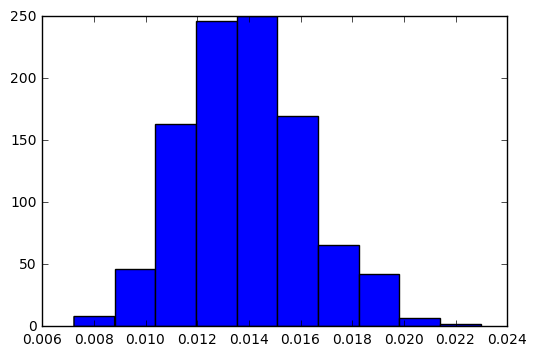

In [143]:
#your code here
plt.hist(sd_accrossPolls)

((array([ -3.19758950e+00,  -2.93237785e+00,  -2.78437841e+00,
          -2.67999560e+00,  -2.59855946e+00,  -2.53139899e+00,
          -2.47402263e+00,  -2.42379214e+00,  -2.37902149e+00,
          -2.33856546e+00,  -2.30160949e+00,  -2.26755284e+00,
          -2.23593934e+00,  -2.20641415e+00,  -2.17869564e+00,
          -2.15255643e+00,  -2.12781017e+00,  -2.10430217e+00,
          -2.08190261e+00,  -2.06050135e+00,  -2.04000420e+00,
          -2.02032992e+00,  -2.00140792e+00,  -1.98317650e+00,
          -1.96558137e+00,  -1.94857451e+00,  -1.93211325e+00,
          -1.91615948e+00,  -1.90067901e+00,  -1.88564107e+00,
          -1.87101783e+00,  -1.85678408e+00,  -1.84291686e+00,
          -1.82939524e+00,  -1.81620005e+00,  -1.80331371e+00,
          -1.79072004e+00,  -1.77840415e+00,  -1.76635224e+00,
          -1.75455157e+00,  -1.74299028e+00,  -1.73165738e+00,
          -1.72054262e+00,  -1.70963644e+00,  -1.69892989e+00,
          -1.68841463e+00,  -1.67808281e+00,  -1.667927

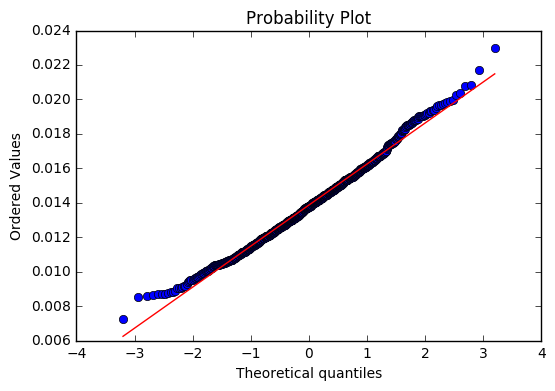

In [144]:
stats.probplot(sd_accrossPolls, dist="norm", plot = plt)

Answer: Normal distribution

#### Problem 2(e) 

What is the standard deviation of M polls in our real (not simulated) 2012 presidential election data ? 

In [145]:
#your code here
np.std(electionNov['Obama'].values/100.0)

0.010829771494232192

Is this larger, the same, or smaller than what we expeced if polls were not biased.

In [146]:
#your code here
np.mean(sd_accrossPolls)

0.013863102767248012

Answer: Saller than what we expected if polls were not biased.

#### Problem 2(f)

**For AC209 Students**: Learn about the normal approximation for the binomial distribution and derive the results of Problem 2(b) and 2(c) analytically (using this approximation). Compare the results obtained analytically to those obtained from simulations.

In [30]:
#your code here

Answer: 

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---Polls from November 2012 have smaller standard deviation WRT standard deviation calculated from a random experiment (1.0% vs. 1.3%). This result probabily means
that polls are not biased: a poll is "balanced" whether or not has been ordered by one of the two parties.


## Problem 3: Is the average of polls better than just one poll?

#### Problem 3(a)

Most undecided voters vote for one of the two candidates at the election. Therefore, the reported percentages underestimate the final value of both candidates. However, if we assume the undecided will split evenly, then the observed difference should be an unbiased estimate of the final difference. 

Add a new column to the `election` DataFrame containg the difference between Obama and Romeny called `Diff`. 

In [150]:
#your code here
election['Diff']=(election['Obama']-election['Romney'])/100
election.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation,Diff
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None,0.00
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None,0.02
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None,0.00
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None,0.01
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None,-0.01


#### Problem 3(b)

Make a plot of the differences for the week before the election (e.g. 5 days) where the days are on the x-axis and the differences are on the y-axis.  Add a horizontal line showing 3.9%: the difference between Obama and Romney on election day.

In [152]:
#your code here
max(election['start_date'])

Timestamp('2012-11-04 00:00:00')

In [164]:

time_begin=pd.to_datetime(['2012-10-26']) #['2002/10/31']
time_end=pd.to_datetime(['2012-10-31'])
Index_nov=[]
for i in range(len(election['end_date'])):
    if election['end_date'][i] >= time_begin and election['end_date'][i] <= time_end:
        Index_nov.append(True)
    else:
        Index_nov.append(False)
election5d = election[Index_nov]                       
len(election5d.values)

19

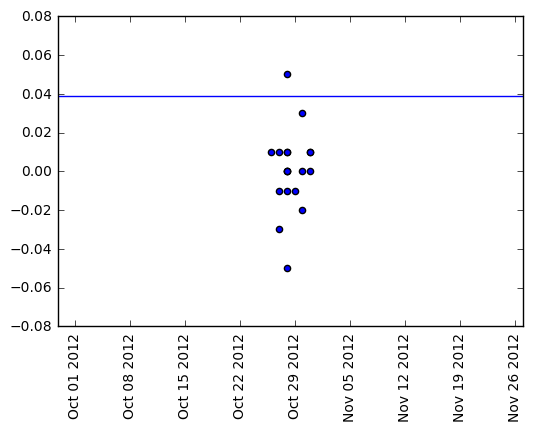

In [166]:
plt.scatter(pd.to_datetime(election5d['end_date']).values, election5d['Diff'].values)
plt.axhline(y=0.039)
#plt.axvline(x=time_end)
plt.xticks( rotation='vertical')
plt.show()

#### Problem 3(c) 

Make a plot showing the differences by pollster where the pollsters are on the x-axis and the differences on the y-axis. 

In [184]:
#your code here
pollsters = list(set(election5d['pollster'].values))
print (pollsters)
pollster2index = {}
for i in range(len(pollsters)):
    pollster2index[pollsters[i]] = i
print (pollster2index)
print (len(election5d['Diff'].values))
len(pollsters)
#plt.scatter((election5d['pollster']).values, election5d['Diff'].values)
#plt.show()

['ABC/Post', 'FOX', 'Ipsos/Reuters (Web)', 'YouGov/Economist', 'Pew', 'Gallup', 'Rasmussen', 'High Point University', 'CBS/Times', 'DailyKos/SEIU/PPP (D)', 'United Technologies/National Journal', 'ARG', 'PPP (D-Americans United for Change)', 'IBD/TIPP', 'JZ Analytics/Newsmax', 'Washington Times/JZ Analytics']
{'ABC/Post': 0, 'FOX': 1, 'Ipsos/Reuters (Web)': 2, 'YouGov/Economist': 3, 'Pew': 4, 'ARG': 11, 'Gallup': 5, 'CBS/Times': 8, 'Rasmussen': 6, 'High Point University': 7, 'DailyKos/SEIU/PPP (D)': 9, 'United Technologies/National Journal': 10, 'PPP (D-Americans United for Change)': 12, 'IBD/TIPP': 13, 'JZ Analytics/Newsmax': 14, 'Washington Times/JZ Analytics': 15}
19


16

In [186]:
election5d.sort(['pollster'])

C:\Anaconda2\envs\snakes\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation,Diff
28,49.0,48.0,NaN,NaN,16436,ABC/Post,2012-10-28,2012-10-31,Likely Voters,1293.0,Live Phone,Nonpartisan,None,0.01
43,48.0,49.0,1.0,2.0,16257,ABC/Post,2012-10-24,2012-10-27,Likely Voters,1278.0,Live Phone,Nonpartisan,None,-0.01
39,48.0,48.0,3.0,1.0,16284,ARG,2012-10-25,2012-10-28,Likely Voters,1200.0,Live Phone,Nonpartisan,None,0.00
37,48.0,47.0,3.0,1.0,16346,CBS/Times,2012-10-25,2012-10-28,Likely Voters,563.0,Live Phone,Nonpartisan,None,0.01
38,49.0,49.0,3.0,NaN,16322,DailyKos/SEIU/PPP (D),2012-10-25,2012-10-28,Likely Voters,1400.0,Automated Phone,Sponsor,Dem,0.00
30,46.0,46.0,6.0,1.0,16385,FOX,2012-10-28,2012-10-30,Likely Voters,1128.0,Live Phone,Nonpartisan,None,0.00
41,46.0,51.0,NaN,NaN,16279,Gallup,2012-10-22,2012-10-28,Likely Voters,2700.0,Live Phone,Nonpartisan,None,-0.05
32,46.0,43.0,11.0,1.0,16425,High Point University,2012-10-22,2012-10-30,Registered Voters,805.0,Live Phone,Nonpartisan,None,0.03
44,45.0,44.0,7.0,NaN,16244,IBD/TIPP,2012-10-22,2012-10-27,Likely Voters,942.0,Live Phone,Nonpartisan,None,0.01
45,47.0,46.0,5.0,3.0,16209,Ipsos/Reuters (Web),2012-10-22,2012-10-26,Likely Voters,1237.0,Internet,Nonpartisan,None,0.01


[15, 0, 2, 1, 6, 7, 14, 3, 12, 10, 8, 9, 11, 4, 5, 6, 0, 13, 2]


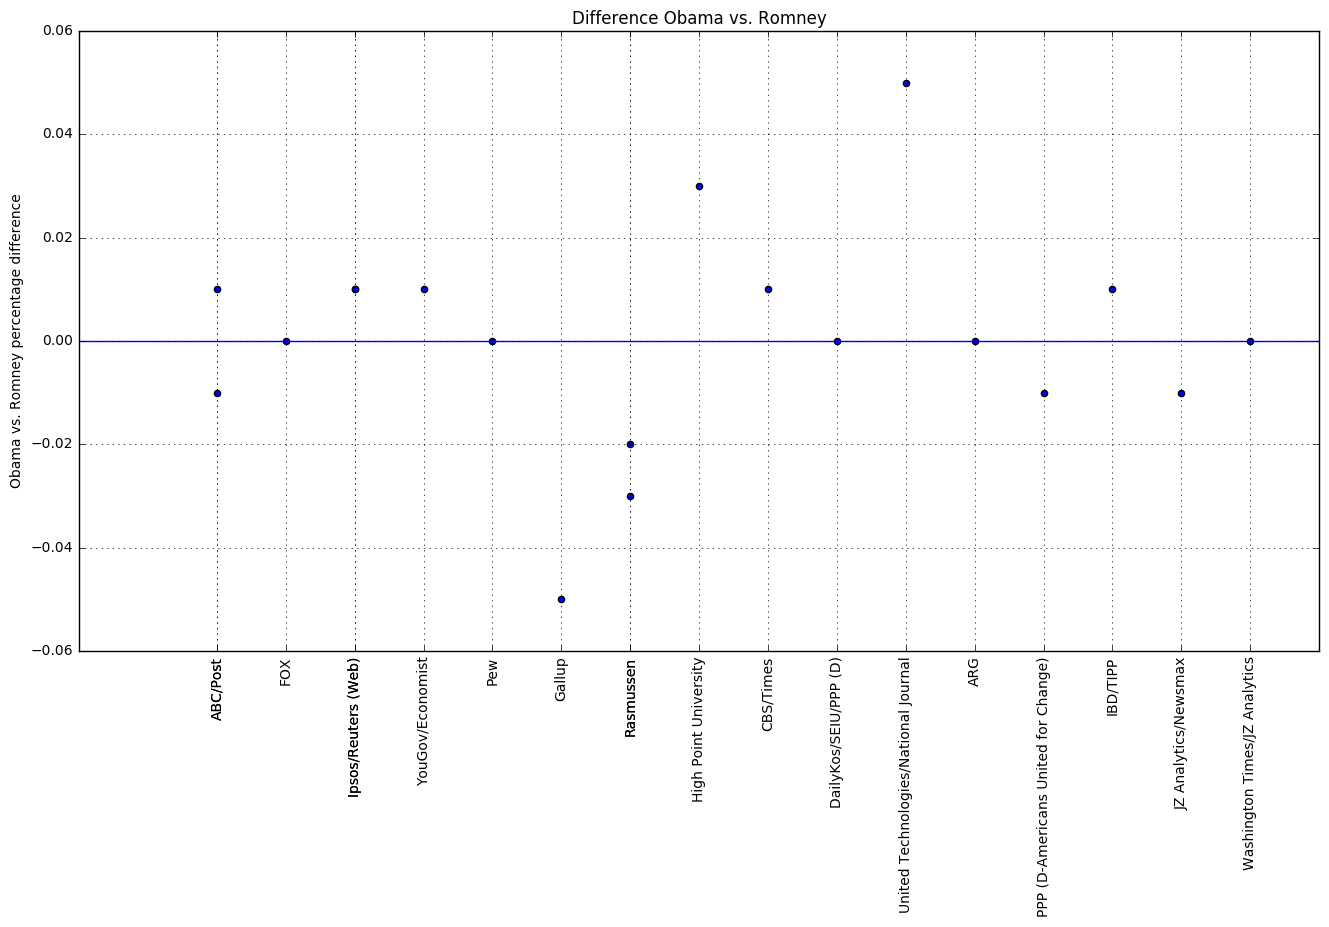

In [181]:
plt.figure(num=None, figsize=(16, 8), dpi=300, facecolor='w', edgecolor='k')
X = [pollster2index[pollster] for pollster in election5d['pollster'].values]
print (X)
plt.scatter(X, election5d['Diff'].values)
plt.xticks(X, election5d['pollster'].values)
plt.xticks(rotation=90)
plt.axhline(y=0)
plt.title('Difference Obama vs. Romney')
plt.ylabel('Obama vs. Romney percentage difference')
plt.grid(True)
plt.show()

Is the *across poll* difference larger than the *between pollster* difference? 

Answer:Larger 

#### Problem 3(d)

Take the average for each pollster and then compute the average of that. Given this difference how confident would you have been of an Obama victory?

**Hint**: Compute an estimate of the SE of this average based exclusively on the observed data. 

In [189]:
#your code here
temp = election.loc[:,['pollster','Diff']].copy()
temp.head()

,pollster,Diff
0,Politico/GWU/Battleground,0.00
1,YouGov/Economist,0.02
2,Gravis Marketing,0.00
3,IBD/TIPP,0.01
4,Rasmussen,-0.01


In [190]:
diffMeans= temp.groupby(temp.pollster).mean()
diffMeans.head()

,Diff
pollster,
ABC/Post,0.014286
AP-GfK,0.031667
ARG,-0.002500
Allstate/National Journal,0.070000
Angus-Reid,0.006667


In [191]:
np.mean(diffMeans['Diff'].values), np.std(diffMeans['Diff'].values)

(0.026412633916754795, 0.025102468826693852)

Answer: 

#### Problem 3(e)

**For AC209 Students**: Show the difference against time and see if you can detect a trend towards the end. Use this trend to see if it improves the final estimate.

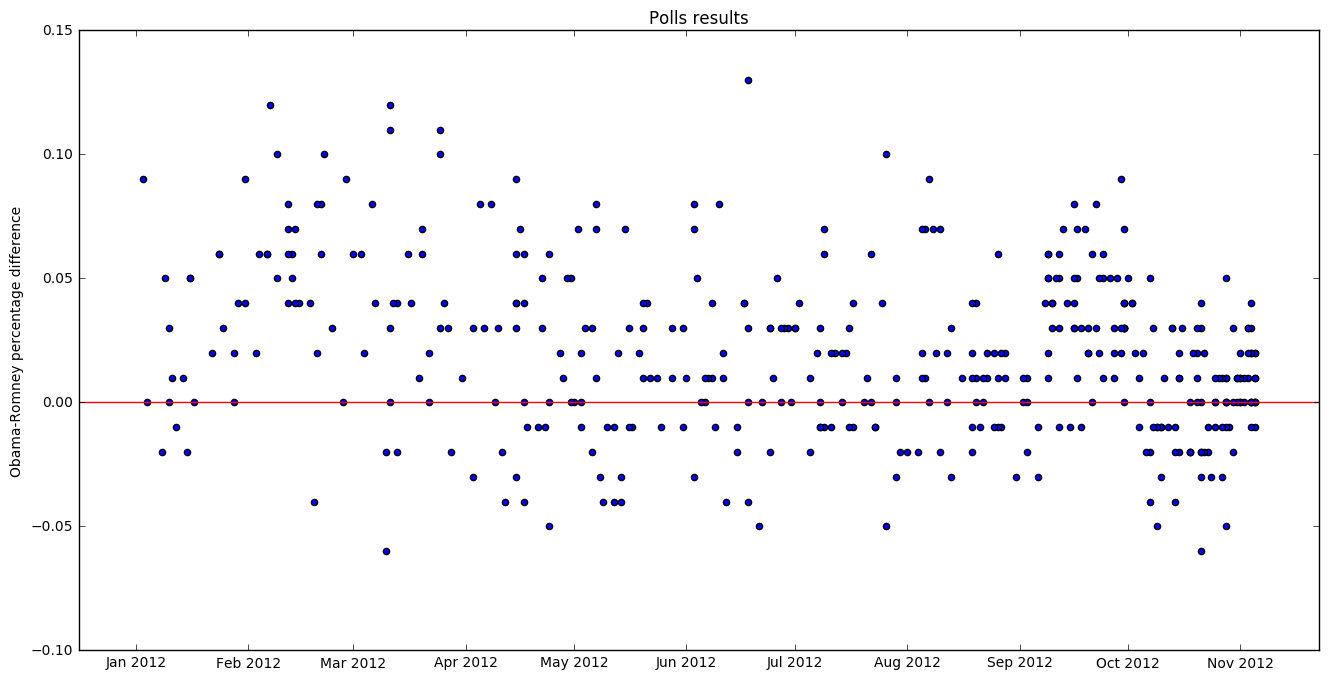

In [197]:
#your code here
plt.figure(num=None, figsize=(16, 8), dpi=300, facecolor='w', edgecolor='k')
plt.scatter(pd.to_datetime(election['end_date']).values, election['Diff'].values)
plt.axhline(y=0, c='r')
plt.ylabel('Obama-Romney percentage difference')
plt.title('Polls results')
plt.show()

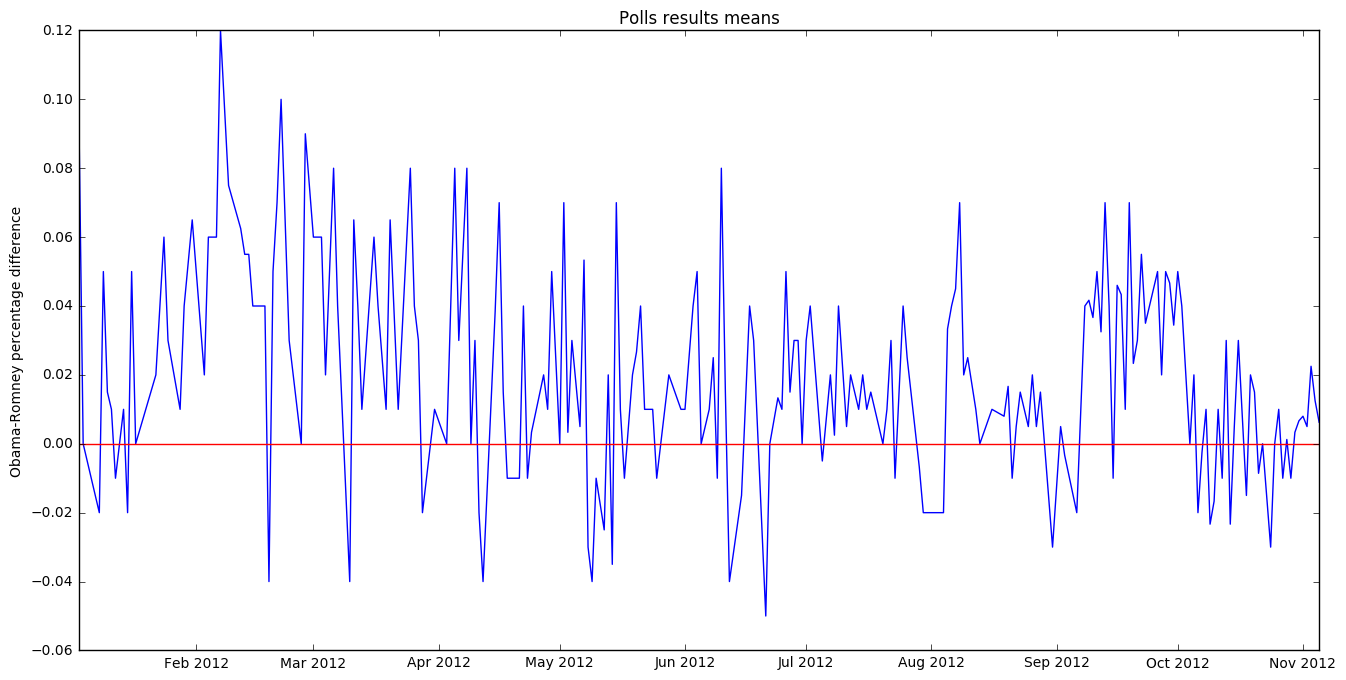

In [198]:
dayMeans = election.groupby('end_date').mean()
plt.figure(num=None, figsize=(16, 8), dpi=300, facecolor='w', edgecolor='k')
plt.plot(pd.to_datetime(dayMeans.index).values, dayMeans['Diff'].values)
plt.axhline(y=0, c='r')
plt.ylabel('Obama-Romney percentage difference')
plt.title('Polls results means')
plt.show()

Answer: 

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*
Averaging polls can intuitivly give the main advantage of balancing the variance that can be rilevant. In this case I can't make any prediction about the victory of Obama
or Romney.
---


## Problem 4

In this last problem, we will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to create a preliminary prediction of the result of each state. 

The HuffPost Pollster API allows you to access the data as a CSV or a JSON response by tacking ".csv" or ".json" at the end of the URLs. For example the 2012 Presidential Election could be accessed as a [.json](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.json) instead of a [.csv](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv)

#### Problem 4(a)

Read in the polls for **all** of the 2014 Senate Elections using the HuffPost API. For example, we can consider the [2014 Senate race in Kentucky between Mitch McConnell and Alison Grimes](http://elections.huffingtonpost.com/pollster/2014-kentucky-senate-mcconnell-vs-grimes). 

To search for the 2014 Senate races, use the `topics` parameter in the API [[read more about topics here](http://elections.huffingtonpost.com/pollster/api)].  

In [6]:
#!conda install StringIO -q -y

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

In [2]:
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"

To list all the URLs related to the 2014 Senate races using the pollster API, we can use a list comprehension:

In [3]:
election_urls = [election['url'] + '.csv' for election in requests.get(url_str).json()]
election_urls

[u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-massachusetts-senate-herr-vs-markey.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-montana-senate-daines-vs-curtis.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-oklahoma-senate-lankford-vs-johnson.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-hawaii-senate-cavasso-vs-schatz.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-kansas-senate-roberts-vs-orman-vs-taylor.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-wyoming-senate.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-tennessee-senate-alexander-vs-ball.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-idaho-senate-risch-vs-mitchell.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-new-jersey-senate-bell-vs-booker

Because there so many Senate races, we can create a dictionary of pandas DataFrames that will be keyed by the name of the election (a string). 

In [4]:
def build_frame(url):
    """
    Returns a pandas DataFrame object containing
    the data returned from the given url
    """
    source = requests.get(url).text
    
    # Use StringIO because pd.DataFrame.from_csv requires .read() method
    s = StringIO(source)
    
    return pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True)

In [5]:
dfs = dict((election.split("/")[-1][:-4], build_frame(election)) for election in election_urls)# Makes a dictionary of pandas DataFrames keyed on election string.


C:\Anaconda2\envs\arc1041\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [7]:
dfs

{u'2014-alaska-senate-sullivan-vs-begich':                                             Pollster Start Date   End Date  \
 0                                            PPP (D) 2014-11-01 2014-11-02   
 1                                          Rasmussen 2014-10-27 2014-10-30   
 2                 Moore (R-Sullivan For U.S. Senate) 2014-10-26 2014-10-28   
 3                                         Ivan Moore 2014-10-24 2014-10-26   
 4                                     CBS/NYT/YouGov 2014-10-16 2014-10-23   
 5   Harstad (D-Senate Majority PAC/Put Alaska First) 2014-10-18 2014-10-22   
 6                                         Hellenthal 2014-10-15 2014-10-21   
 7                                          Rasmussen 2014-10-08 2014-10-12   
 8                                                FOX 2014-10-04 2014-10-07   
 9                                                CNN 2014-10-01 2014-10-06   
 10              Hickman (D-Consumer Energy Alliance) 2014-09-26 2014-10-02   
 11       

Show the head of the DataFrame containing the polls for the 2014 Senate race in Kentucky between McConnell and Grimes.

In [8]:
#your code here
kentukyPollName = ''
for key in dfs.keys():
    if 'kentucky' in key:
        kentukyPollName = key
        break
        
print kentukyPollName

2014-kentucky-senate-mcconnell-vs-grimes


In [98]:
dfs[kentukyPollName]

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Sponsor,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1
5,VCR (R-McConnell),2014-10-16,2014-10-21,2014-10-22 20:51:03,815,Likely Voters,Live Phone,41.0,49.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/VCRMcConn...,Sponsor,Rep,NaN,1
6,Western Kentucky University,2014-10-16,2014-10-19,2014-10-21 11:18:33,557,Likely Voters,Live Phone,42.0,45.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://wkussrc.blogspot.com/2014/10/2014-big-r...,Nonpartisan,None,NaN,1
7,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-15,2014-10-19,2014-10-20 22:11:55,655,Likely Voters,IVR/Online,43.0,44.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
8,Rasmussen,2014-10-15,2014-10-16,2014-10-17 16:57:36,1000,Likely Voters,IVR/Online,44.0,52.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
9,Gravis/Human Events (R),2014-10-11,2014-10-12,2014-10-20 01:55:53,1020,Likely Voters,Automated Phone,47.0,50.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://gravismarketing.com/polling-and-market-...,Sponsor,Rep,NaN,1


#### Problem 4(b)

For each 2014 Senate race, create a preliminary prediction of the result for that state.

In [9]:
#your code here
df = dfs[kentukyPollName]
candidate1 = df.columns[7]
candidate2 = df.columns[8]
df['Diff'] = df[candidate1]-df[candidate2]
diffs = df['Diff'].values
diffMean = sum(diffs)/len(diffs)
if (diffMean>=0):
    result = (candidate1, diffMean)
else:
    result = (candidate2, -diffMean)
result

('McConnell', 3.0)

In [22]:
def getPredictionForDataFrame(df):
    candidate1 = df.columns[7]
    candidate2 = df.columns[8]
    df['Diff'] = df[candidate1]-df[candidate2]
    diffs = df['Diff'].values
    diffMean = sum(diffs)/len(diffs)
    if (diffMean>=0):
        return (candidate1, diffMean)
    else:
        return (candidate2, -diffMean)
    
getPredictionForDataFrame(dfs['2014-alaska-senate-sullivan-vs-begich'])
#print (dfs.keys)

('Begich', 0.2857142857142857)

In [11]:
print (dfs.keys)

<built-in method keys of dict object at 0x03FC5420>


In [23]:
#format example1: 2014‐idaho‐senate‐risch‐vs‐mitchell
#format example2: 2014‐noth‐carolina‐senate‐risch‐vs‐mitchell
string=u'2014‐noth‐carolina‐senate‐risch‐vs‐mitchell'
temp = string.split('senate')[0].split('‐')
print len(temp)
string.split('senate')[0].split('‐')[1:len(temp)-1]
' '.join(string.split('senate')[0].split('‐')[1:len(temp)-1])

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 0: ordinal not in range(128)

In [24]:
string='2014‐noth‐carolina‐senate‐risch‐vs‐mitchell'
temp = string.split('senate')[0].split('‐')
print len(temp)
string.split('senate')[0].split('‐')[1:len(temp)-1]
' '.join(string.split('senate')[0].split('‐')[1:len(temp)-1])
print 'state,winner,diff'


4
state,winner,diff


In [73]:
 u'foo'.decode('utf8'), u'foo'.encode('ascii')

(u'foo', 'foo')

In [52]:
print 'state,winner,diff'

state,winner,diff


In [71]:
string='2014‐noth‐carolina‐senate‐risch‐vs‐mitchell'
string, string.decode('utf8'),string.decode('ascii')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 4: ordinal not in range(128)

In [64]:
def extractStateName(string):
    #string.decode('utf-8')
    temp = string.split('senate')[0].split('.')
    name = ' '.join(string.split('senate')[0].split('.')[1:len(temp)-1])
    return name


for key in dfs.keys():
    print key
    temp=key.replace('-','.')
    key_ascii=extractStateName(temp)
    print key_ascii



2014-kentucky-senate-mcconnell-vs-grimes
kentucky
2014-montana-senate-daines-vs-curtis
montana
2014-north-carolina-senate-tillis-vs-hagan
north carolina
2014-tennessee-senate-alexander-vs-ball
tennessee
2014-michigan-senate-land-vs-peters
michigan
2014-alaska-senate-sullivan-vs-begich
alaska
2014-oregon-senate-wehby-vs-merkley
oregon
2014-new-hampshire-senate-brown-vs-shaheen
new hampshire
2014-mississippi-senate-cochran-vs-childers
mississippi
2014-massachusetts-senate-herr-vs-markey
massachusetts
2014-rhode-island-senate-zaccaria-vs-reed
rhode island
2014-louisiana-senate-cassidy-vs-landrieu
louisiana
2014-nebraska-senate-sasse-vs-domina
nebraska
2014-iowa-senate-ernst-vs-braley
iowa
2014-oklahoma-senate-inhofe-vs-silverstein
oklahoma
2014-oklahoma-senate-lankford-vs-johnson
oklahoma
2014-illinois-senate-oberweis-vs-durbin
illinois
2014-idaho-senate-risch-vs-mitchell
idaho
2014-south-carolina-senate-graham-vs-hutto
south carolina
2014-maine-senate-collins-vs-bellows
maine
2014-west-v

In [65]:
print 'state,winner,diff'
for key in dfs.keys():
    temp=key.replace('-','.')
    key_ascii=extractStateName(temp)
    prediction = getPredictionForDataFrame(dfs[key])
    print key_ascii+','+str(prediction[0])+','+str(prediction[1])

state,winner,diff
kentucky,McConnell,3.0
montana,Daines,17.1428571429
north carolina,Tillis,nan
tennessee,Alexander,19.0
michigan,Peters,5.61194029851
alaska,Begich,0.285714285714
oregon,Merkley,13.3157894737
new hampshire,Shaheen,5.38709677419
mississippi,Cochran,15.5
massachusetts,Markey,22.4615384615
rhode island,Reed,35.5
louisiana,Cassidy,4.125
nebraska,Sasse,24.5
iowa,Braley,0.0363636363636
oklahoma,Inhofe,32.0
oklahoma,Lankford,31.125
illinois,Durbin,12.4
idaho,Risch,29.8333333333
south carolina,Graham,15.0
maine,Collins,32.375
west virginia,Capito,14.0714285714
hawaii,Schatz,40.375
delaware,Coons,17.4
virginia,Warner,15.4545454545
minnesota,Franken,10.8095238095
new mexico,Udall,14.5833333333
georgia,Perdue,1.74509803922
kansas,Roberts,nan
south dakota,Rounds,13.0
new jersey,Booker,13.7333333333
wyoming,Enzi,44.8
texas,Cornyn,19.1
arkansas,Cotton,1.50819672131
south carolina,Scott,21.5
colorado,Gardner,0.555555555556
new hampshire,Shaheen,15.3333333333


# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
